##<i class="fa fa-diamond"></i> Primero pimpea tu libreta!

In [1]:
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = os.getcwd()
    styles = "<style>\n%s\n</style>" % (open(os.path.join(base,'files/custom.css'),'r').read())
    return HTML(styles)
css_styling()

In [5]:
n=  1000000
sum =0.0
valor = 1/ float(n)

for i in range(0,n+1):
    sum += valor
    
print("%10f"%sum)

  1.000001


# <i class="fa fa-book"></i> Primero librerias

In [6]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns
%matplotlib inline

# <i class="fa fa-database"></i> Vamos a crear datos de jugete
## Crea varios "blobs"

recuerda la funcion de scikit-learn *datasets.make_blobs()*
 Tambien prueba
 
```python
 centers = [[1, 1], [-1, -1], [1, -1]]
 X,Y = datasets.make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
```


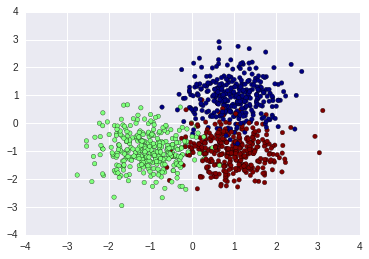

In [71]:
centers = [[1, 1], [-1, -1], [1, -1]]
X,Y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.jet()

# <i class="fa fa-tree"></i> Ahora vamos a crear un modelo de arbol

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Arbol3.PNG/350px-Arbol3.PNG)

podemos usar **DecisionTreeClassifier** como clasificador

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


## <i class="fa fa-question-circle"></i> Que parametros y funciones tiene el classificador?
### Hint: usa **help(cosa)**!

In [22]:
help(clf)

Help on DecisionTreeClassifier in module sklearn.tree.tree object:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |        - If int, then consider `max_features` features at each split.
 |        - If float, then `max_features` is a percentage and
 |          `int(max_features * n_features)` features are cons

 vamos a ajustar nuestro modelo con **fit** y sacar su puntaje con **score**

In [26]:
clf.fit(X,Y)
clf.score(X,Y)


1.0

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X[:1000],Y[:1000])
clf.score(X,Y)*100

90.450000000000003

# <i class="fa fa-question-circle"></i>
## Por que no queremos 100%?
###  Este problema se llama "Overfitting"

![](http://scikit-learn.org/stable/_images/plot_underfitting_overfitting_0011.png)

## <i class="fa fa-list"></i>   Pasos para un tipico algoritmo ML:

* Crear un modelo
* Particionar tus datos en diferentes pedazos (10% entrenar y 90% prueba)
* Entrenar tu modelo sobre cada pedazo de los datos
* Escogete el mejor modelo o el promedio de los modelos
* Predice!

Primero vamos a particionar los datos usando ** **

In [33]:
from sklearn.cross_validation import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.90)

cuales son los tamanios de estos nuevos datos?

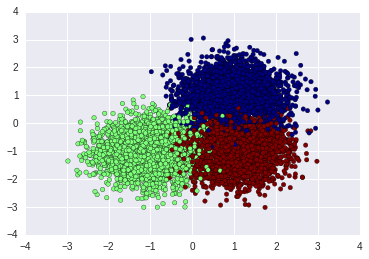

In [36]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

### y ahora entrenamos nuestro modelo y checamos el error

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)*100

89.900000000000006

# <i class="fa fa-question-circle"></i>
### Como se ve nuestro modelo?
### Que fue mas importante para hacer una decision?
### Como podemos mejorar  y controlar como dividimos nuestros datos?


In [39]:
clf.feature_importances_

array([ 0.46621362,  0.53378638])

## Validación cruzada y
## K-fold

![](https://upload.wikimedia.org/wikipedia/commons/f/fc/4fold3class.jpg)

![](http://www.mdpi.com/sensors/sensors-12-12489/article_deploy/html/images/sensors-12-12489f7-1024.png)

Y lo mejor es que podemos hacer todo de usa sola patada con sci-kit!

Hay que usar **cross_val_score**

In [50]:
from sklearn.cross_validation import cross_val_score

resultados = cross_val_score(clf,X,Y, cv=10)

In [51]:
np.mean(resultados)

1.0

# <i class="fa fa-question-circle"></i>
## Y como podemos mejorar un arbol de decision?
![](http://www.diariodemexico.com.mx/wp-content/uploads/2013/06/bosque.jpg)

![](http://blog.yhathq.com/static/img/a_random_forest.png)

** RandomForestClassifier(n_estimators=n_estimators)** Al rescate!

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


a probarlo!

In [61]:
resultados = cross_val_score(clf,X,Y, cv=10)

mejoro?

In [62]:
resultados.mean()

0.9247007642372912

### Pero ahora tenemos un parametro nuevo, cuantos arboles queremos usar?

#### <i class="fa fa-tree"></i>,<i class="fa fa-tree"></i>,<i class="fa fa-tree"></i> ...

Que tal si probamos con un for loop!? Y checamos el error conforme al numero de arboles?

## Actividad!
Hay que :

* Definir nuestro rango de arboles a probar en un arreglo
* hacer un for loop sobre este arreglo
    * Para cada elemento, entrena un bosque y saca el score
    * Guarda el score en una lista
    * graficalo!

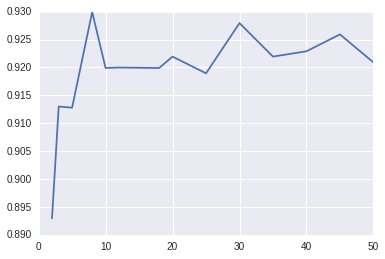

In [74]:
ks=[2,3,5,8,10,12,15,18,20,25,30,35,40,45,50]
scores=[]
for i in ks:
    clf = RandomForestClassifier(n_estimators=i)
    resultados = cross_val_score(clf,X,Y, cv=10)
    scores.append( np.mean(resultados) )

plt.plot(ks,scores)

# <i class="fa fa-pagelines"></i> El conjunto de datos Iris
## Un modelo multi-dimensional

In [ ]:
g = sns.PairGrid(iris, hue="species")
g = g.map(plt.scatter)
g = g.add_legend()

## Actividad:

### Objetivo: Entrena un arbol para predecir la especie de la planta

* Checa las graficas, que variables podrian ser mas importante?
* Agarra los datos, que dimensiones son?
* Rompelos en pedacitos y entrena tus modelos
* Que scores te da? Que resulto ser importante?

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target